<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICAIL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 1 </h2>
<h2 style="color:blue" align="center"> A CAPSTONE PROJECT ON DATA VISUALIZATION OF THE EM-DAT DATA ON GLOBAL WEATHER DISASTER</h2>

<h2> PROBLEM STATEMENT </h2>

<p> <br>Global warming has since been a major concerns for stake holders. Hence this project is aimed at performing the following:</p>
    
<b>1.</b>  What is the current trend and distribution of weather disaster so recorded in human history from 1900 to date?

<b>2.</b>  What are the continental distribution of these weather disaster?

<b>3.</b>  How much death, economic impact has these done on the countries and continent as a whole> </p>

In order to lessen the effects of disasters on vulnerable communities, development and relief organizations have long recognized the critical role that data and information play. Governments and organizations in charge of relief and recovery efforts benefit greatly from systematic data collection and analysis. They are also essential for incorporating health elements into programs that fight poverty and promote development.

<b>a.</b>  Data Mining and acquisition

<b>b.</b> Data Cleaning and EDA

<b>c.</b>  Data Visualization
    
<b>d.</b>  Model the weather disaster data using machine learning


<h2> a. DATA MINING AND ACQUISITION </h2>
<p> In order to lessen the effects of disasters on vulnerable communities, development and relief organizations have long recognized the critical role that data and information play. Governments and organizations in charge of relief and recovery efforts benefit greatly from systematic data collection and analysis. They are also essential for incorporating health elements into programs that fight poverty and promote development. <br>
    
In crisis circumstances, [EM-DAT](https://www.emdat.be/) offers a rational basis for decision-making and an objective framework for assessing vulnerability. For instance, it aids decision-makers in determining the disaster categories that are most prevalent in a certain nation and have historically had a substantial impact on human populations.<br>
    
In this study, we access the EM-DAT database and query data global weather disasters from 1900-2022. The defination of the features can be found on thier [website](https://www.emdat.be/explanatory-notes). The data can be mined from the [database](https://public.emdat.be/). </p> 


<h2> b. DATA CLEANING AND EDA </h2>

In [2]:
#import necessary modules for the data workflow

import pandas as pd
import numpy as np

## Modules for visuals
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline
import plotly.express as px
from matplotlib import transforms, pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#!pip install missingno
import missingno as msno # helps to visualise missing values

from csv import reader
%matplotlib inline

#for map visuals
import folium as fo
from folium import plugins

In [3]:
# read in the dataset
df = pd.read_csv('data.csv', low_memory = False) # setting low_memory = false makes pandas read in all rows of data once and assigns appropriate data type to each column
pd.set_option('display.max_columns', None)
df.head(5)

Dis No  Year   Seq Glide Disaster Group Disaster Subgroup  \
0  1900-9002-CPV  1900  9002   NaN        Natural    Climatological   
1  1900-9001-IND  1900  9001   NaN        Natural    Climatological   
2  1901-0003-BEL  1901     3   NaN  Technological     Technological   
3  1902-0012-GTM  1902    12   NaN        Natural       Geophysical   
4  1902-0003-GTM  1902     3   NaN        Natural       Geophysical   

         Disaster Type Disaster Subtype Disaster Subsubtype   Event Name  \
0              Drought          Drought                 NaN          NaN   
1              Drought          Drought                 NaN          NaN   
2  Industrial accident        Explosion                 NaN    Coal mine   
3           Earthquake  Ground movement                 NaN          NaN   
4    Volcanic activity         Ash fall                 NaN  Santa Maria   

      Country  ISO           Region Continent                   Location  \
0  Cabo Verde  CPV   Western Africa    Africa                Countrywide   
1       India  IND    Southern Asia      Asia                     Bengal   
2     Belgium  BEL   Western Europe    Europe                      Hornu   
3   Guatemala  GTM  Central America  Americas  Quezaltenango, San Marcos   
4   Guatemala  GTM  Central America  Americas                        NaN   

  Origin      Associated Dis Associated Dis2 OFDA Response Appeal Declaration  \
0    NaN              Famine             NaN           NaN     No          No   
1    NaN                 NaN             NaN           NaN     No          No   
2    NaN                 NaN             NaN           NaN     No          No   
3    NaN  Tsunami/Tidal wave             NaN           NaN    NaN         NaN   
4    NaN                 NaN             NaN           NaN    NaN         NaN   

   AID Contribution ('000 US$)  Dis Mag Value Dis Mag Scale   Latitude  \
0                          NaN            NaN           Km2  16.000055   
1                          NaN            NaN           Km2  22.351115   
2                          NaN            NaN            m3  50.640281   
3                          NaN            8.0       Richter  15.585555   
4                          NaN            NaN           NaN  15.585555   

   Longitude Local Time River Basin  Start Year  Start Month  Start Day  \
0 -24.008395        NaN         NaN        1900          NaN        NaN   
1  78.667743        NaN         NaN        1900          NaN        NaN   
2   4.666715        NaN         NaN        1901          4.0       27.0   
3 -90.345759      20:20         NaN        1902          4.0       18.0   
4 -90.345759        NaN         NaN        1902          4.0        8.0   

   End Year  End Month  End Day  Total Deaths  No Injured  No Affected  \
0      1900        NaN      NaN       11000.0         NaN          NaN   
1      1900        NaN      NaN     1250000.0         NaN          NaN   
2      1901        4.0     27.0          18.0         NaN          NaN   
3      1902        4.0     18.0        2000.0         NaN          NaN   
4      1902        4.0      8.0        1000.0         NaN          NaN   

   No Homeless  Total Affected  Reconstruction Costs ('000 US$)  \
0          NaN             NaN                              NaN   
1          NaN             NaN                              NaN   
2          NaN             NaN                              NaN   
3          NaN             NaN                              NaN   
4          NaN             NaN                              NaN   

   Reconstruction Costs, Adjusted ('000 US$)  Insured Damages ('000 US$)  \
0                                        NaN                         NaN   
1                                        NaN                         NaN   
2                                        NaN                         NaN   
3                                        NaN                         NaN   
4                                        NaN              

In [4]:
# check the shape of the data
df.shape

(25263, 50)

In [5]:
# view all column names
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [6]:
# check for missing values
df.isnull().sum()

Dis No                                           0
Year                                             0
Seq                                              0
Glide                                        23610
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              3139
Disaster Subsubtype                          24189
Event Name                                   17310
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                      2297
Origin                                       21240
Associated Dis                               21812
Associated Dis2                              24545
OFDA Response                                23412
Appeal                         

In [7]:
# check for column data types
df.dtypes

Dis No                                        object
Year                                           int64
Seq                                            int64
Glide                                         object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
Disaster Subsubtype                           object
Event Name                                    object
Country                                       object
ISO                                           object
Region                                        object
Continent                                     object
Location                                      object
Origin                                        object
Associated Dis                                object
Associated Dis2                               object
OFDA Response                                 

In [8]:
# check for duplicates
df.duplicated().sum()

0

<p> It is noted that the data is very dirty with alot of null values. We will attempt to fill it up where necessary but before we do that we will perform the following:
    
<b> 1. </b> Find the total null values in each column<br> 
<b> 2. </b> Find the percentage of the null values as compared to the entire data<br>
<b> 3. </b> Make a barplot and heat map of the null values to enable us decide which features to fill up or drop. 

In [9]:

df.isnull().sum()

Dis No                                           0
Year                                             0
Seq                                              0
Glide                                        23610
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              3139
Disaster Subsubtype                          24189
Event Name                                   17310
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                      2297
Origin                                       21240
Associated Dis                               21812
Associated Dis2                              24545
OFDA Response                                23412
Appeal                         

In [10]:
# get percentage of the null values in every column
null_percentage = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100
null_percentage

Reconstruction Costs, Adjusted ('000 US$)    99.861457
Reconstruction Costs ('000 US$)              99.861457
Associated Dis2                              97.157899
AID Contribution ('000 US$)                  96.880814
Disaster Subsubtype                          95.748723
Insured Damages, Adjusted ('000 US$)         95.622056
Insured Damages ('000 US$)                   95.622056
Local Time                                   95.491430
River Basin                                  94.778926
Glide                                        93.456834
OFDA Response                                92.673079
No Homeless                                  89.672644
Associated Dis                               86.339706
Origin                                       84.075525
Admin2 Code                                  83.687606
Admin1 Code                                  81.134465
Dis Mag Value                                80.326960
Total Damages, Adjusted ('000 US$)           78.141947
Total Dama

<AxesSubplot:>

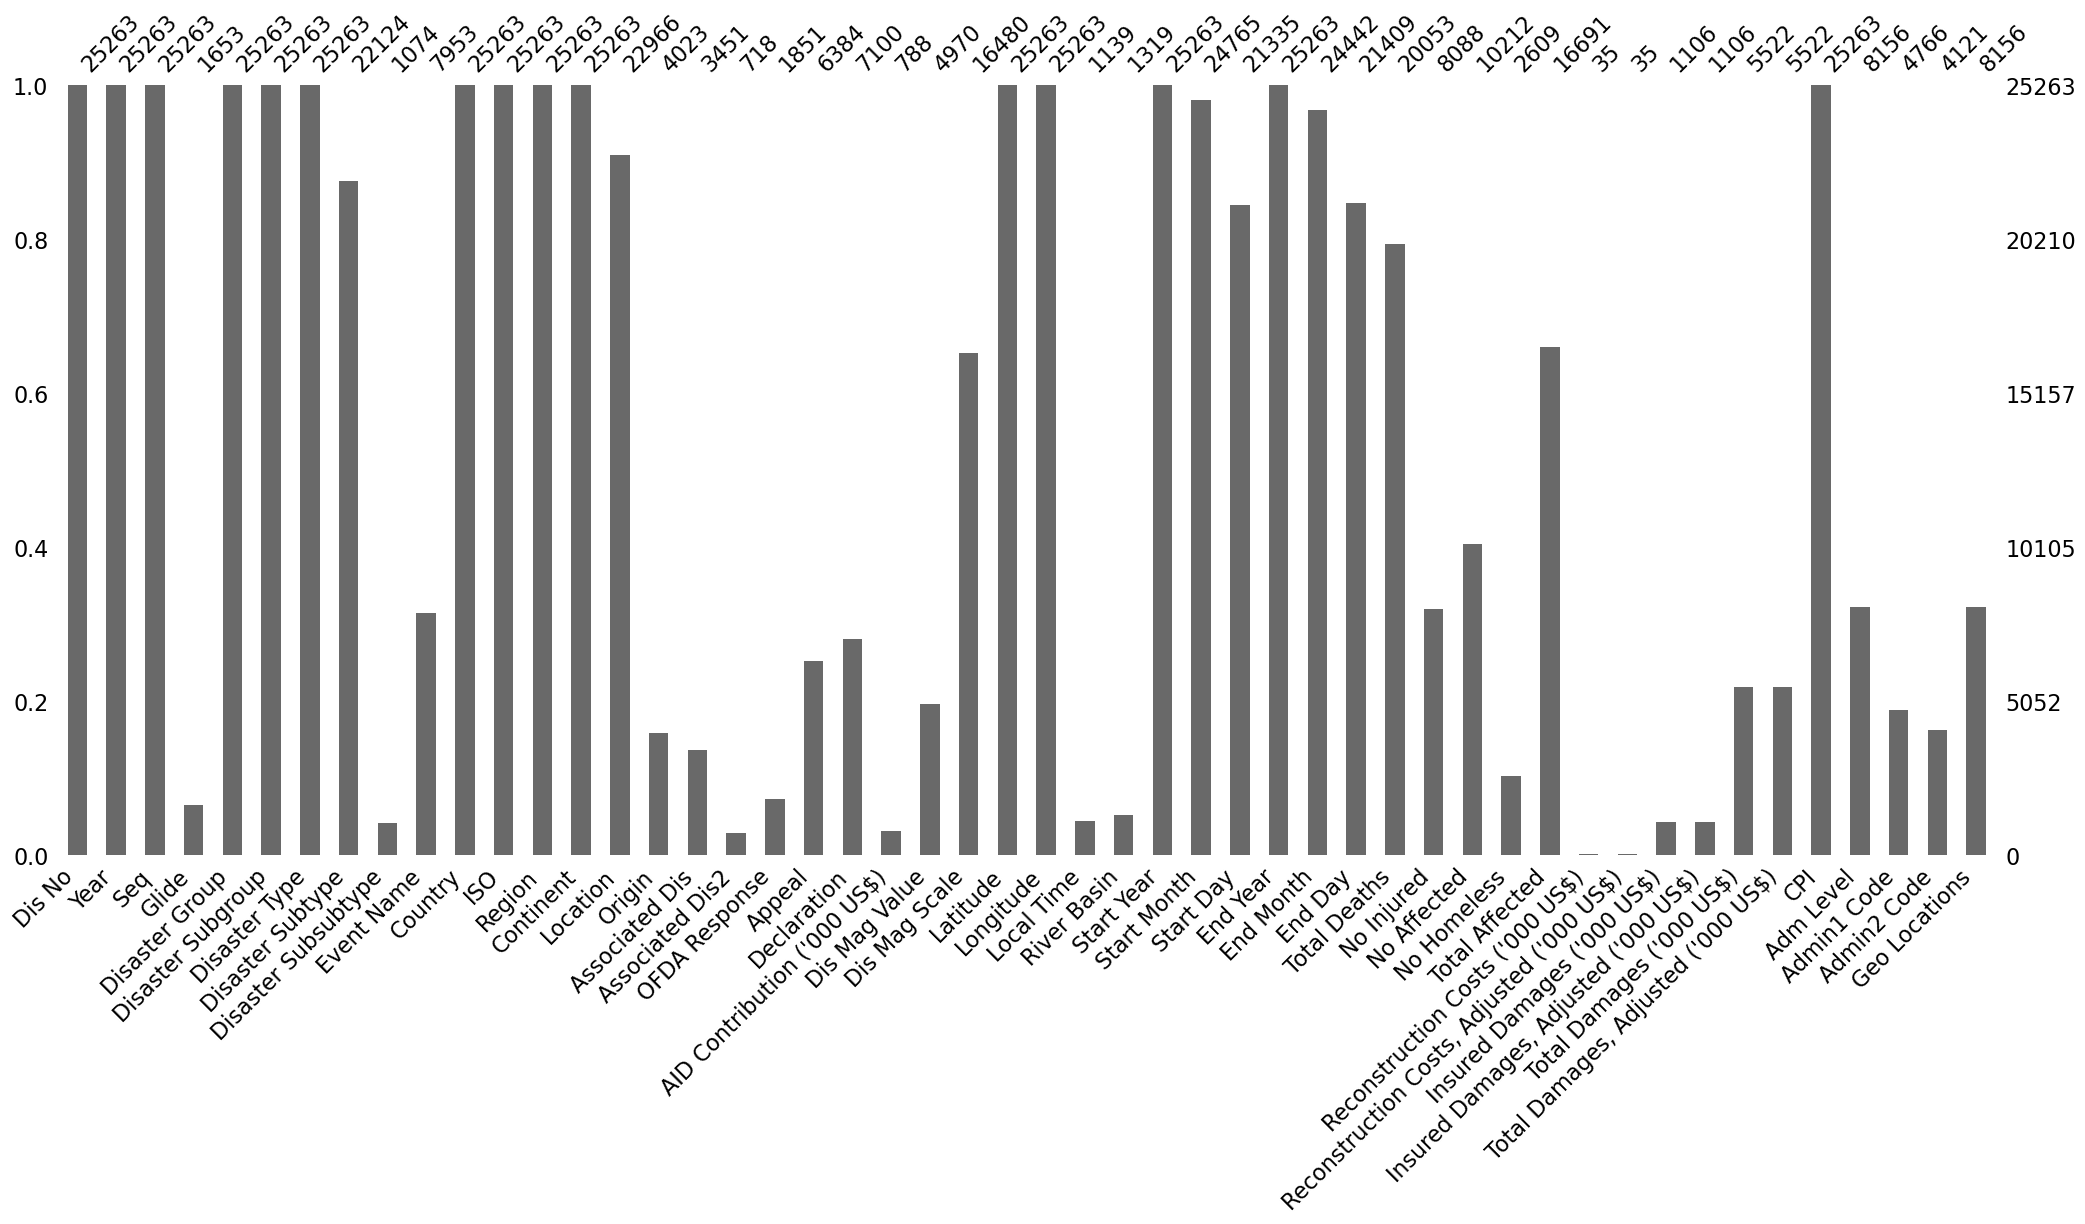

In [11]:
## Plot of missing data in the data frame
msno.bar(df)

In [12]:
# heatmap showing correlation between missing values
msno.heatmap(df)

<AxesSubplot:>

In [13]:
# List of columns having more than 60% null values
col_to_drop = null_percentage[null_percentage>= 70].keys()
col_to_drop

Index(['Reconstruction Costs, Adjusted ('000 US$)',
       'Reconstruction Costs ('000 US$)', 'Associated Dis2',
       'AID Contribution ('000 US$)', 'Disaster Subsubtype',
       'Insured Damages, Adjusted ('000 US$)', 'Insured Damages ('000 US$)',
       'Local Time', 'River Basin', 'Glide', 'OFDA Response', 'No Homeless',
       'Associated Dis', 'Origin', 'Admin2 Code', 'Admin1 Code',
       'Dis Mag Value', 'Total Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Appeal', 'Declaration'],
      dtype='object')

In [14]:
# drop the selected columns
#df = df.drop(col_to_drop, axis = 1)
#df.isnull().sum()

In [15]:
# drop columns that are not needed
df.drop(columns = ['Dis No','Seq', 'Glide','Disaster Subsubtype',
       'Event Name', 'ISO', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',"AID Contribution ('000 US$)", "Dis Mag Value",
       'Dis Mag Scale','Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day',"Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)", "Total Damages, Adjusted ('000 US$)",
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'], inplace = True)
df.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Appeal',
       'Declaration', 'Latitude', 'Longitude', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

<h3> Data visuals for Africa </h3>
 <p>
To have a glimps of the data, we vill visualise the data continental wise. The following columns had a high percentage of missing value collectively across all continents, hence the need to drop them, with additional columns that are not relevant to the study.
    
1.  No Injured
2.  Adm Level
3.  Geo location
4.  Event Name
5.  Dis Mag Scale
6.  Location
7.  Dis No
8.  Start Year which is the same record as the Year column
9.  End Year which is also the same record as the Year column
10. ISO - This is just a three letter code for each country
11. The Declaration and Appeal columns are left out of the list because they are conditions that needs to be met for a disaster to be recorded</p>

In [16]:
df['Continent'].value_counts()

Asia        10506
Americas     5535
Africa       5275
Europe       3202
Oceania       745
Name: Continent, dtype: int64

In [17]:
# relationship of missing values with the observed data
data_africa = df.loc[(df["Continent"] == "Africa")]
data_africa

Year Disaster Group Disaster Subgroup           Disaster Type  \
0      1900        Natural    Climatological                 Drought   
7      1903        Natural       Geophysical       Volcanic activity   
36     1910        Natural    Climatological                 Drought   
40     1910        Natural    Climatological                 Drought   
42     1910        Natural       Geophysical              Earthquake   
...     ...            ...               ...                     ...   
25258  2017  Technological     Technological  Miscellaneous accident   
25259  2019        Natural        Biological                Epidemic   
25260  2020        Natural        Biological                Epidemic   
25261  2021        Natural    Climatological                 Drought   
25262  2021        Natural        Biological                Epidemic   

        Disaster Subtype                       Country           Region  \
0                Drought                    Cabo Verde   Western Africa   
7               Ash fall                 Comoros (the)   Eastern Africa   
36               Drought                  Burkina Faso   Western Africa   
40               Drought                    Cabo Verde   Western Africa   
42       Ground movement                       Algeria  Northern Africa   
...                  ...                           ...              ...   
25258           Collapse                       Senegal   Western Africa   
25259                NaN                   Sudan (the)  Northern Africa   
25260  Parasitic disease                   Sudan (the)  Northern Africa   
25261            Drought  Tanzania, United Republic of   Eastern Africa   
25262  Parasitic disease                   Sudan (the)  Northern Africa   

      Continent Appeal Declaration   Latitude  Longitude  Total Deaths  \
0        Africa     No          No  16.000055 -24.008395       11000.0   
7        Africa     No          No -12.204518  44.283296          17.0   
36       Africa    NaN         NaN  12.075308  -1.688031           NaN   
40       Africa    NaN         NaN  16.000055 -24.008395           NaN   
42       Africa    NaN         NaN  28.000027   2.999983          12.0   
...         ...    ...         ...        ...        ...           ...   
25258    Africa    NaN         NaN  14.475061 -14.452961           8.0   
25259    Africa    NaN         NaN  51.504868  -0.138629          29.0   
25260    Africa    NaN         NaN  51.504868  -0.138629          38.0   
25261    Africa    NaN         NaN  -6.524712  35.787844           NaN   
25262    Africa    NaN         NaN  51.504868  -0.138629          69.0   

       No Injured  No Affected  No Homeless  Total Affected  \
0             NaN          NaN          NaN             NaN   
7             NaN          NaN          NaN             NaN   
36            NaN          NaN          NaN             NaN   
40            NaN          NaN          NaN             NaN   
42            NaN          NaN          NaN             NaN   
...           ...          ...          ...             ...   
25258       100.0          NaN          NaN           100.0   
25259      2098.0          NaN          NaN          2098.0   
25260      2137.0          NaN          NaN          2137.0   
25261         NaN     497000.0          NaN        497000.0   
25262      2973.0          NaN          NaN          2973.0   

       Total Damages ('000 US$)         CPI  
0                           NaN    3.077091  
7                           NaN    3.323258  
36                          NaN    3.446342  
40                          NaN    3.446342  
42                          NaN    3.446342  
...                         ...         ...  
25258                       NaN   90.460179  
25259                       NaN   94.349092  
25260                       NaN   95.512967  
25261                       NaN  100.000000  
25262                       NaN  100.000000  

[5275 rows x 19 columns]

In [18]:
##Percentage measure of missing data for Africa
null_percentage_africa = data_africa.isnull().sum().sort_values(ascending = False)/data_africa.shape[0]*100
null_percentage_africa

Total Damages ('000 US$)    93.364929
No Homeless                 90.691943
No Injured                  71.165877
Appeal                      63.298578
Declaration                 62.729858
No Affected                 56.834123
Total Affected              28.075829
Total Deaths                19.601896
Disaster Subtype            10.483412
Longitude                    0.000000
Year                         0.000000
Latitude                     0.000000
Disaster Group               0.000000
Continent                    0.000000
Region                       0.000000
Country                      0.000000
Disaster Type                0.000000
Disaster Subgroup            0.000000
CPI                          0.000000
dtype: float64

<h3> Data visuals for Asia </h3>

In [19]:
### Perform same for other continent, Asia, America, Europe

data_asia = df.loc[(df["Continent"] == "Asia")]
data_asia

Year Disaster Group Disaster Subgroup           Disaster Type  \
1      1900        Natural    Climatological                 Drought   
10     1904        Natural    Meteorological                   Storm   
13     1905        Natural       Geophysical              Earthquake   
21     1906        Natural    Meteorological                   Storm   
23     1907        Natural       Geophysical              Earthquake   
...     ...            ...               ...                     ...   
25237  2021        Natural      Hydrological                   Flood   
25238  2021  Technological     Technological  Miscellaneous accident   
25239  2021        Natural      Hydrological                   Flood   
25256  2021  Technological     Technological  Miscellaneous accident   
25257  2021  Technological     Technological  Miscellaneous accident   

       Disaster Subtype     Country         Region Continent Appeal  \
1               Drought       India  Southern Asia      Asia     No   
10     Tropical cyclone  Bangladesh  Southern Asia      Asia    NaN   
13      Ground movement       India  Southern Asia      Asia    NaN   
21     Tropical cyclone   Hong Kong   Eastern Asia      Asia     No   
23      Ground movement       China   Eastern Asia      Asia    NaN   
...                 ...         ...            ...       ...    ...   
25237       Flash flood       Yemen   Western Asia      Asia    NaN   
25238              Fire       Yemen   Western Asia      Asia    NaN   
25239               NaN       Yemen   Western Asia      Asia    NaN   
25256              Fire        Iraq   Western Asia      Asia    NaN   
25257             Other      Israel   Western Asia      Asia    NaN   

      Declaration   Latitude   Longitude  Total Deaths  No Injured  \
1              No  22.351115   78.667743     1250000.0         NaN   
10            NaN  24.476929   90.293441           NaN         NaN   
13            NaN  22.351115   78.667743       20000.0         NaN   
21             No  22.279328  114.162813       10000.0         NaN   
23            NaN  35.000074  104.999927       12000.0         NaN   
...           ...        ...         ...           ...         ...   
25237         NaN  16.347124   47.891527          13.0         NaN   
25238         NaN  16.347124   47.891527          43.0       170.0   
25239         NaN  16.347124   47.891527          33.0        28.0   
25256         NaN  33.095579   44.174977          82.0       110.0   
25257         NaN  30.812425   34.859476          45.0         NaN   

       No Affected  No Homeless  Total Affected  Total Damages ('000 US$)  \
1              NaN          NaN             NaN                       NaN   
10             NaN          NaN             NaN                       NaN   
13             NaN          NaN             NaN                   25000.0   
21             NaN          NaN             NaN                   20000.0   
23             NaN          NaN             NaN                       NaN   
...            ...          ...             ...                       ...   
25237      22380.0          NaN         22380.0                       NaN   
25238          NaN          NaN           170.0                       NaN   
25239     205800.0          NaN        205828.0                       NaN   
25256          NaN          NaN           110.0                       NaN   
25257          NaN          NaN             NaN                       NaN   

              CPI  
1        3.077091  
10       3.323258  
13       3.323258  
21       3.323258  
23       3.446342  
...           ...  
25237  100.000000  
25238  100.000000  
25239  100.000000  
25256  100.000000  
25257  100.000000  

[10506 rows x 19 columns]

In [20]:
null_percentage_asia = data_asia.isnull().sum().sort_values(ascending = False)/data_asia.shape[0]*100
null_percentage_asia.head(5)

No Homeless                 88.492290
Total Damages ('000 US$)    76.822768
Appeal                      76.537217
Declaration                 76.032743
No Injured                  61.964592
dtype: float64

<h3> Data visuals for Europe </h3>

In [21]:

data_europe = df.loc[(df["Continent"] == "Europe")]
data_europe

Year Disaster Group Disaster Subgroup           Disaster Type  \
2      1901  Technological     Technological     Industrial accident   
8      1903  Technological     Technological  Miscellaneous accident   
9      1904  Technological     Technological  Miscellaneous accident   
11     1905  Technological     Technological     Industrial accident   
16     1906        Natural      Hydrological                   Flood   
...     ...            ...               ...                     ...   
25172  2021        Natural       Geophysical       Volcanic activity   
25174  2021        Natural      Hydrological                   Flood   
25175  2021        Natural      Hydrological                   Flood   
25202  2021  Technological     Technological  Miscellaneous accident   
25253  2021        Natural      Hydrological                   Flood   

      Disaster Subtype    Country           Region Continent Appeal  \
2            Explosion    Belgium   Western Europe    Europe     No   
8                 Fire     France   Western Europe    Europe    NaN   
9            Explosion    Belgium   Western Europe    Europe     No   
11           Explosion    Belgium   Western Europe    Europe     No   
16                 NaN    Belgium   Western Europe    Europe    NaN   
...                ...        ...              ...       ...    ...   
25172        Lava flow  Canary Is  Southern Europe    Europe    NaN   
25174              NaN   Slovenia  Southern Europe    Europe    NaN   
25175      Flash flood     Sweden  Northern Europe    Europe    NaN   
25202             Fire    Ukraine   Eastern Europe    Europe    NaN   
25253              NaN     Serbia  Southern Europe    Europe    NaN   

      Declaration   Latitude  Longitude  Total Deaths  No Injured  \
2              No  50.640281   4.666715          18.0         NaN   
8             NaN  46.603354   1.888334          84.0         NaN   
9              No  50.640281   4.666715          15.0         2.0   
11             No  50.640281   4.666715          16.0         NaN   
16            NaN  50.640281   4.666715           6.0         NaN   
...           ...        ...        ...           ...         ...   
25172         Yes  44.893564 -91.926002           1.0         NaN   
25174         NaN  45.813311  14.480837           NaN         NaN   
25175         NaN  59.674971  14.520858           NaN         NaN   
25202         NaN  49.487197  31.271832          15.0         NaN   
25253         Yes  44.153412  20.551440           NaN         NaN   

       No Affected  No Homeless  Total Affected  Total Damages ('000 US$)  \
2              NaN          NaN             NaN                       NaN   
8              NaN          NaN             NaN                       NaN   
9              NaN          NaN             2.0                       NaN   
11             NaN          NaN             NaN                       NaN   
16             NaN          NaN             NaN                       NaN   
...            ...          ...             ...                       ...   
25172        339.0       6549.0          6888.0                 1000000.0   
25174       1500.0          NaN          1500.0                       NaN   
25175      13500.0          NaN         13500.0                   70000.0   
25202          9.0          NaN             9.0                       NaN   
25253         22.0          NaN            22.0                       NaN   

              CPI  
2        3.077091  
8        3.323258  
9        3.323258  
11       3.323258  
16       3.323258  
...           ...  
25172  100.000000  
25174  100.000000  
25175  100.000000  
25202  100.000000  
25253  100.000000  

[3202 rows x 19 columns]

In [22]:
null_percentage_europe = data_europe.isnull().sum().sort_values(ascending = False)/data_europe.shape[0]*100
null_percentage_europe

No Homeless                 94.690818
Appeal                      75.046846
Total Damages ('000 US$)    74.359775
No Injured                  71.923798
Declaration                 71.049344
No Affected                 71.049344
Total Affected              47.688944
Total Deaths                28.076202
Disaster Subtype            14.303560
Longitude                    0.000000
Year                         0.000000
Latitude                     0.000000
Disaster Group               0.000000
Continent                    0.000000
Region                       0.000000
Country                      0.000000
Disaster Type                0.000000
Disaster Subgroup            0.000000
CPI                          0.000000
dtype: float64

<h3> Data visuals for America </h3>

In [23]:
data_america = df.loc[(df["Continent"] == "Americas")]
data_america

Year Disaster Group Disaster Subgroup        Disaster Type  \
3      1902        Natural       Geophysical           Earthquake   
4      1902        Natural       Geophysical    Volcanic activity   
5      1902        Natural       Geophysical    Volcanic activity   
6      1903        Natural       Geophysical  Mass movement (dry)   
12     1905        Natural       Geophysical  Mass movement (dry)   
...     ...            ...               ...                  ...   
25226  2021        Natural      Hydrological                Flood   
25227  2021        Natural    Climatological             Wildfire   
25229  2021        Natural       Geophysical    Volcanic activity   
25230  2021        Natural    Meteorological                Storm   
25231  2021        Natural      Hydrological                Flood   

       Disaster Subtype                             Country            Region  \
3       Ground movement                           Guatemala   Central America   
4              Ash fall                           Guatemala   Central America   
5              Ash fall                           Guatemala   Central America   
6              Rockfall                              Canada  Northern America   
12             Rockfall                              Canada  Northern America   
...                 ...                                 ...               ...   
25226               NaN      United States of America (the)  Northern America   
25227               NaN      United States of America (the)  Northern America   
25229  Pyroclastic flow    Saint Vincent and the Grenadines         Caribbean   
25230  Tropical cyclone    Saint Vincent and the Grenadines         Caribbean   
25231               NaN  Venezuela (Bolivarian Republic of)     South America   

      Continent Appeal Declaration   Latitude   Longitude  Total Deaths  \
3      Americas    NaN         NaN  15.585555  -90.345759        2000.0   
4      Americas    NaN         NaN  15.585555  -90.345759        1000.0   
5      Americas    NaN         NaN  15.585555  -90.345759        6000.0   
6      Americas    NaN         NaN  61.066692 -107.991707          76.0   
12     Americas    NaN         NaN  61.066692 -107.991707          18.0   
...         ...    ...         ...        ...         ...           ...   
25226  Americas    NaN         Yes  29.633008  -97.988594           1.0   
25227  Americas    NaN         Yes  29.633008  -97.988594           2.0   
25229  Americas    Yes         NaN  12.904470  -61.276557           NaN   
25230  Americas    NaN         NaN  12.904470  -61.276557           NaN   
25231  Americas    NaN         NaN   8.001871  -66.110932           NaN   

       No Injured  No Affected  No Homeless  Total Affected  \
3             NaN          NaN          NaN             NaN   
4             NaN          NaN          NaN             NaN   
5             NaN          NaN          NaN             NaN   
6            23.0          NaN          NaN            23.0   
12           18.0          NaN          NaN            18.0   
...           ...          ...          ...             ...   
25226         NaN        500.0          NaN           500.0   
25227         NaN       3273.0        381.0          3654.0   
25229         NaN      13300.0          NaN         13300.0   
25230         NaN        129.0          NaN           129.0   
25231         NaN       1200.0          NaN          1200.0   

       Total Damages ('000 US$)         CPI  
3                       25000.0    3.200175  
4                           NaN    3.200175  
5                           NaN    3.200175  
6                           NaN    3.323258  
12                          NaN    3.323258  
...                         ...         ...  
25226                  200000.0  100.000000  
25227                 3300000.0  100.000000  
25229                  325000.0  100.000000  
25230                       NaN  100.000000  
25231                       NaN  100.0000

In [24]:
null_percentage_america = data_america.isnull().sum().sort_values(ascending = False)/data_america.shape[0]*100
null_percentage_america

No Homeless                 88.690154
Appeal                      80.162602
Declaration                 72.484192
No Injured                  72.357724
Total Damages ('000 US$)    70.840108
No Affected                 58.066847
Total Affected              36.440831
Total Deaths                26.395664
Disaster Subtype            14.543812
Longitude                    0.000000
Year                         0.000000
Latitude                     0.000000
Disaster Group               0.000000
Continent                    0.000000
Region                       0.000000
Country                      0.000000
Disaster Type                0.000000
Disaster Subgroup            0.000000
CPI                          0.000000
dtype: float64

<h3> Data visuals for oceania </h3>

In [25]:
data_oceania = df.loc[(df["Continent"] == "Oceania")]
data_oceania

Year Disaster Group Disaster Subgroup       Disaster Type  \
180    1931        Natural    Meteorological               Storm   
194    1934  Technological     Technological  Transport accident   
233    1938  Technological     Technological  Transport accident   
244    1939        Natural    Climatological            Wildfire   
256    1940  Technological     Technological  Transport accident   
...     ...            ...               ...                 ...   
25024  2020        Natural    Meteorological               Storm   
25053  2020        Natural    Meteorological               Storm   
25144  2021        Natural    Meteorological               Storm   
25194  2021        Natural    Climatological             Drought   
25236  2021        Natural       Geophysical   Volcanic activity   

                       Disaster Subtype    Country                     Region  \
180                    Tropical cyclone       Fiji                  Melanesia   
194                                 Air  Australia  Australia and New Zealand   
233                                 Air  Australia  Australia and New Zealand   
244    Land fire (Brush, Bush, Pasture)  Australia  Australia and New Zealand   
256                                 Air  Australia  Australia and New Zealand   
...                                 ...        ...                        ...   
25024                  Tropical cyclone     Tuvalu                  Polynesia   
25053                  Tropical cyclone    Vanuatu                  Melanesia   
25144                  Tropical cyclone      Palau                 Micronesia   
25194                           Drought     Tuvalu                  Polynesia   
25236                          Ash fall    Vanuatu                  Melanesia   

      Continent Appeal Declaration   Latitude   Longitude  Total Deaths  \
180     Oceania    NaN         NaN -18.123970  179.012274         200.0   
194     Oceania    NaN         NaN -24.776109  134.755000          11.0   
233     Oceania    NaN         NaN -24.776109  134.755000          18.0   
244     Oceania    NaN         NaN -24.776109  134.755000          71.0   
256     Oceania    NaN         NaN -24.776109  134.755000          10.0   
...         ...    ...         ...        ...         ...           ...   
25024   Oceania    NaN         Yes  -8.640521  179.158292           NaN   
25053   Oceania    NaN         NaN -16.525507  168.106915           3.0   
25144   Oceania    NaN         NaN   5.378354  132.910257           NaN   
25194   Oceania    NaN         NaN  -8.640521  179.158292           NaN   
25236   Oceania    NaN         NaN -16.525507  168.106915           NaN   

       No Injured  No Affected  No Homeless  Total Affected  \
180           NaN          NaN          NaN             NaN   
194           NaN          NaN          NaN             NaN   
233           NaN          NaN          NaN             NaN   
244           NaN          NaN       3900.0          3900.0   
256           NaN          NaN          NaN             NaN   
...           ...          ...          ...             ...   
25024         NaN       5500.0          NaN          5500.0   
25053       120.0     130000.0          NaN        130120.0   
25144         NaN       7288.0          NaN          7288.0   
25194         NaN      10204.0          NaN         10204.0   
25236         NaN       3383.0          NaN          3383.0   

       Total Damages ('000 US$)         CPI  
180                         NaN    5.624922  
194                         NaN    4.947962  
233                         NaN    5.206438  
244                         NaN    5.144896  
256                         NaN    5.181821  
...                         ...         ...  
25024                       NaN   95.512967  
25053                       NaN   95.512967  
25144                       NaN  100.000000  
25194                       NaN  100.000000  
25236                       NaN  100.000000  

[745 r

In [26]:
null_percentage_oceania = data_oceania.isnull().sum().sort_values(ascending = False)/data_oceania.shape[0]*100
null_percentage_oceania

Appeal                      88.456376
No Homeless                 84.832215
No Injured                  80.939597
Declaration                 77.718121
Total Damages ('000 US$)    59.463087
Total Deaths                48.322148
No Affected                 43.489933
Total Affected              31.946309
Disaster Subtype            13.154362
Longitude                    0.000000
Year                         0.000000
Latitude                     0.000000
Disaster Group               0.000000
Continent                    0.000000
Region                       0.000000
Country                      0.000000
Disaster Type                0.000000
Disaster Subgroup            0.000000
CPI                          0.000000
dtype: float64

In [27]:
df.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Appeal',
       'Declaration', 'Latitude', 'Longitude', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

In [28]:
# group by types of disaster leading to homelessness
tot_affect = df.groupby('Disaster Type')['Total Affected'].sum()
pd.DataFrame(tot_affect, columns=['Tot affected'])

tot_affect

Disaster Type
Animal accident           5.000000e+00
Complex Disasters         1.968611e+07
Drought                   2.832082e+09
Earthquake                2.033853e+08
Epidemic                  4.965932e+07
Extreme temperature       1.036100e+08
Flood                     3.906757e+09
Fog                       0.000000e+00
Glacial lake outburst     2.400000e+01
Impact                    3.014910e+05
Industrial accident       4.376535e+06
Insect infestation        2.802200e+06
Landslide                 1.465306e+07
Mass movement (dry)       2.753400e+04
Miscellaneous accident    3.640971e+06
Storm                     1.242948e+09
Transport accident        3.155780e+05
Volcanic activity         9.893048e+06
Wildfire                  1.813777e+07
Name: Total Affected, dtype: float64

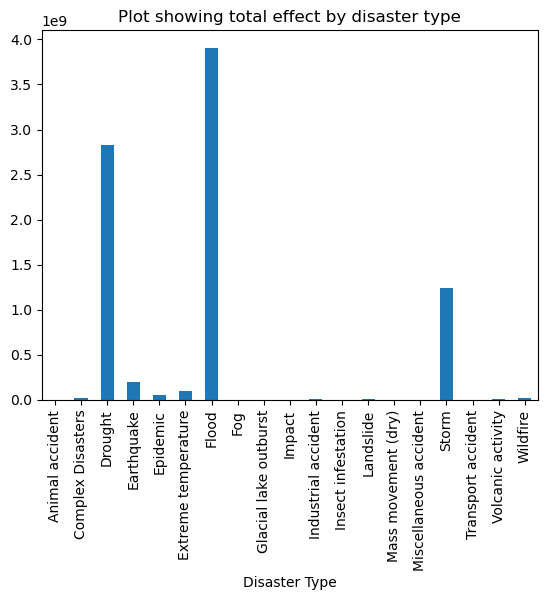

In [29]:
# Plot showing total effect by disadter type

## The graph shows that flood had the highest effect total
tot_affect.plot(kind="bar",stacked=False)
plt.title('Plot showing total effect by disaster type')
ax=plt.gca()
plt.show()

In [30]:
# group by types of disaster leading to injury
Injured = df.groupby('Disaster Type')['No Injured'].sum()
pd.DataFrame(Injured, columns=['No Injured'])

No Injured
Disaster Type                     
Animal accident                0.0
Complex Disasters              0.0
Drought                       32.0
Earthquake               2821192.0
Epidemic                 2575436.0
Extreme temperature      2051466.0
Flood                    1375466.0
Fog                            0.0
Glacial lake outburst         24.0
Impact                      1491.0
Industrial accident       231355.0
Insect infestation             0.0
Landslide                  12229.0
Mass movement (dry)          415.0
Miscellaneous accident     90801.0
Storm                    1396002.0
Transport accident        128107.0
Volcanic activity          26041.0
Wildfire                   11865.0

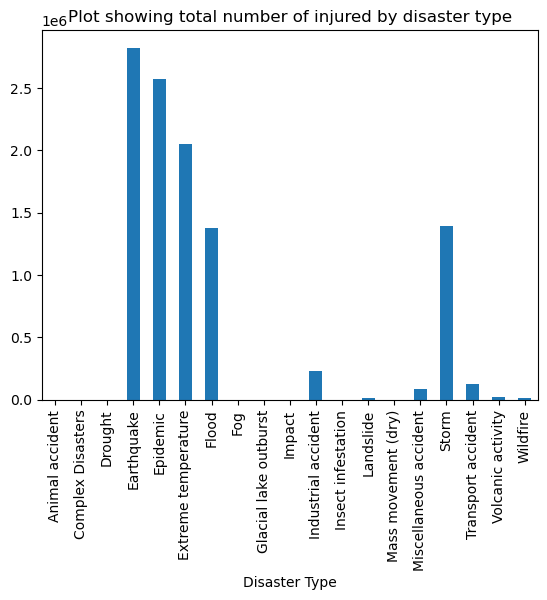

In [31]:
# Plot showing total number injured based on disaster type

## The graph shows that Earthquake  had the highest injury effect total

### It should be noted that the missing values were not supplied from the data source
Injured.plot(kind="bar",stacked=False)
plt.title('Plot showing total number of injured by disaster type')
ax=plt.gca()
plt.show()

<h3> DATA FILL OF NA, NAN AND NULL VALUES USING APPROPRIATE METHODS </h3>
    
 Now that we are certain of the features to drop and use we will attempt to fill the null values while observing statistical rules in filling up null values. These [sites](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) gives a clear explanations of how to go about the [missing](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/#:~:text=5%20Ways%20To%20Handle%20Missing%20Values%20In%20Machine,5%205.%20Using%20Algorithms%20Which%20Support%20Missing%20Values). 

In [32]:
# fill missing values in No Injured and No Affected with mean
df['No Injured'] = df['No Injured'].fillna(df['No Injured'].mean())
df['No Affected'] = df['No Affected'].fillna(df['No Affected'].mean())

In [33]:
#fill missing values in Total Deaths and Total Affected with the mean
df['Total Deaths'] = df['Total Deaths'].fillna(df['Total Deaths'].mean())
df['Total Affected'] = df['Total Affected'].fillna(df['Total Affected'].mean())

In [34]:
# fill missing values in 'Disaster Subtype' and Location columns using interpolation
df['Disaster Subtype'] = df['Disaster Subtype'].fillna(method= 'bfill')
#df['Location'] = df['Location'].fillna(method= 'bfill')

In [35]:
# fill missing values in Appeal, Declaration and Origin column using interpolation - second iteration
df['Appeal'] = df['Appeal'].fillna(method ='ffill')
df['Declaration'] = df['Declaration'].fillna(method ='ffill')
df.isnull().sum()

Year                            0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype                0
Country                         0
Region                          0
Continent                       0
Appeal                          0
Declaration                     0
Latitude                        0
Longitude                       0
Total Deaths                    0
No Injured                      0
No Affected                     0
No Homeless                 22654
Total Affected                  0
Total Damages ('000 US$)    19741
CPI                             0
dtype: int64

<h2> c. DATA VISUALIZATION </h2>

In [36]:
### visaliser country vs cp1
df_cpi = df.groupby(['Country'])['CPI'].sum().reset_index()
df_cpi

Country           CPI
0        Afghanistan  18109.152154
1            Albania   3041.943520
2            Algeria   9203.585049
3     American Samoa    346.568415
4             Angola   8732.434997
..               ...           ...
226   Yemen Arab Rep    219.083507
227  Yemen P Dem Rep    224.330147
228       Yugoslavia   1064.230867
229           Zambia   6087.934502
230         Zimbabwe   7020.946740

[231 rows x 2 columns]

In [37]:
### sort visualise CPI values from high to low
df_cpi = df.groupby(['Country'])['CPI'].sum().reset_index().sort_values('CPI', ascending = False)
df_cpi.head(5)

Country            CPI
40                            China  129137.618285
91                            India   92414.709696
216  United States of America (the)   80584.541910
92                        Indonesia   53783.013618
159               Philippines (the)   51396.612137

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2091498891.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  apps = apps.dropna('columns')


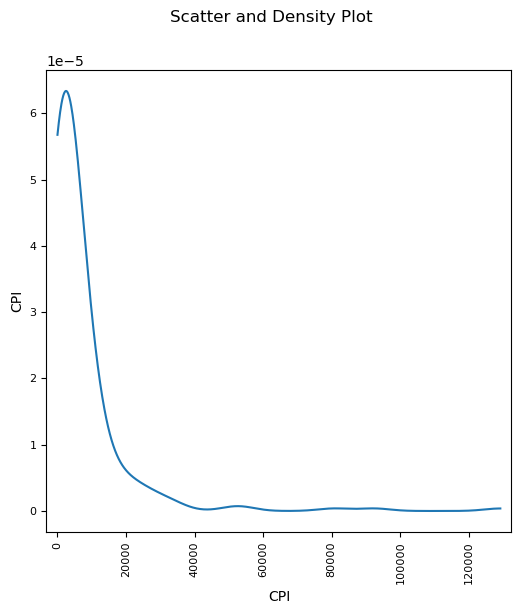

In [38]:
# Scatter and density plots
def plotScatterMatrix(apps, plotSize, textSize):
    apps = apps.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data frame being singular
    apps = apps.dropna('columns')
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(apps)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    apps = apps[columnNames]
    ax = pd.plotting.scatter_matrix(apps, alpha=0.65, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = apps.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
## Call the scatter and density plot
plotScatterMatrix(df_cpi, 6, 15)

In [40]:
df_cont = pd.DataFrame(df.groupby(['Continent','Latitude','Longitude'])['CPI','Total Deaths'].sum().reset_index())
#pd.DataFrame(Injured, columns=['No Injured'])
#df_cont =pd.DataFrame(Injured, columns=['No Injured'])
df_cont = pd.DataFrame(df_cont)

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1347743087.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cont = pd.DataFrame(df.groupby(['Continent','Latitude','Longitude'])['CPI','Total Deaths'].sum().reset_index())


In [41]:
df_cont['Latitude'].mean()

18.96306008630434

In [42]:
df_cont['Longitude'].mean()

9.294362986282604

In [ ]:
#for map visuals
import folium
import folium as fo
from folium import plugins

center = [18.96306008630434, 9.294362986282604]
map_glob = folium.Map(location=center, zoom_start=8)

In [ ]:
for index, df_cont in df_cont.iterrows():
    location = (df_cont['Latitude'], df_cont['Longitude'])
    folium.Marker(location, popup = f'Name:{df_cont["Continent"]}\n Country($):{df_cont["Continent"]}').add_to(map_glob)

# save map to html file
map_glob.save('Cpitotdeath.html')

<h2> GLOBAL DISTRIBUTION OF DEATHS, CPIS BASED ON DISASTER TYPES </H2>

In [ ]:
df_dis1 = df[['Country','Disaster Type','CPI','Total Deaths']]
group_data_dis1 = df_dis1.groupby(['Country','Disaster Type']).sum()
group_data_dis1 = pd.DataFrame(group_data_dis1)
df_dis1 = pd.DataFrame(df_dis1)
print(type(df_dis1))
#print(type(my_series))

In [ ]:
df_dis1.columns

In [ ]:
df_dis1

In [ ]:
for index, df_dis1 in df_dis1.iterrows():
    location = (df_cont['Latitude'], df_cont['Longitude'])
    folium.Marker(location, popup = f'Name:{df_dis1["Country"]}\n Country($):{df_dis1["Disaster Type"]}').add_to(map_glob)

# save map to html file
map_glob.save('destructive.html')

<h2> VISUALIZING THE TOP MOST DESTRUCTIVE DISASTER TYPE BY COUNTRY BY TOTAL DEATH </h2>

In [43]:
#dataframe that gives most ddestructive disaster, most rated and reviewed apps
top_destructive= df.sort_values(by=["Disaster Type", 'Country', 'Total Deaths'], ascending=False)
#top_destructive.head() # main top apps
top_destructive = pd.DataFrame(top_destructive)
top_destructive

Year     Disaster Group  Disaster Subgroup      Disaster Type  \
4890   1983            Natural     Climatological           Wildfire   
4988   1985            Natural     Climatological           Wildfire   
13209  2002            Natural     Climatological           Wildfire   
1438   1947            Natural     Climatological           Wildfire   
2010   1970            Natural     Climatological           Wildfire   
...     ...                ...                ...                ...   
10113  1998  Complex Disasters  Complex Disasters  Complex Disasters   
16495  2007  Complex Disasters  Complex Disasters  Complex Disasters   
16732  2008  Complex Disasters  Complex Disasters  Complex Disasters   
5587   1992  Complex Disasters  Complex Disasters  Complex Disasters   
21327  2014            Natural         Biological    Animal accident   

                       Disaster Subtype                         Country  \
4890                        Forest fire                      Yugoslavia   
4988                        Forest fire                      Yugoslavia   
13209                       Forest fire                        Viet Nam   
1438                        Forest fire  United States of America (the)   
2010   Land fire (Brush, Bush, Pasture)  United States of America (the)   
...                                 ...                             ...   
10113                            Famine                        Cambodia   
16495                            Famine                         Burundi   
16732                           Drought                      Bangladesh   
5587                             Famine                         Armenia   
21327                    Riverine flood                     Niger (the)   

                   Region Continent Appeal Declaration   Latitude   Longitude  \
4890      Southern Europe    Europe     No          No  23.041237  -81.526142   
4988      Southern Europe    Europe     No          No  23.041237  -81.526142   
13209  South-Eastern Asia      Asia     No          No  15.926666  107.965086   
1438     Northern America  Americas     No          No  29.633008  -97.988594   
2010     Northern America  Americas     No          No  29.633008  -97.988594   
...                   ...       ...    ...         ...        ...         ...   
10113  South-Eastern Asia      Asia     No          No  12.543322  104.814491   
16495      Eastern Africa    Africa     No          No  -3.426449   29.932452   
16732       Southern Asia      Asia     No          No  24.476929   90.293441   
5587         Western Asia      Asia    Yes         Yes  40.769627   44.673665   
21327      Western Africa    Africa     No          No  10.713370    4.273548   

       Total Deaths   No Injured   No Affected  No Homeless  Total Affected  \
4890    1917.261507  1325.658012  8.051290e+05          NaN    5.040007e+05   
4988    1917.261507  1325.658012  8.051290e+05          NaN    5.040007e+05   
13209   1917.261507  1325.658012  8.051290e+05          NaN    5.040007e+05   
1438    1917.261507  1325.658012  8.051290e+05          NaN    5.040007e+05   
2010    1917.261507  1325.658012  8.051290e+05          NaN    5.040007e+05   
...             ...          ...           ...          ...             ...   
10113   1917.261507  1325.658012  9.000000e+05          NaN    9.000000e+05   
16495   1917.261507  1325.658012  2.000000e+06          NaN    2.000000e+06   
16732   1917.261507  1325.658012  1.284000e+05          NaN    1.284000e+05   
5587    1917.261507  1325.658012  3.500000e+06          NaN    3.500000e+06   
21327     12.000000  1325.658012  5.000000e+00          NaN    5.000000e+00   

       Total Damages ('000 US$)        CPI  
4890                   200000.0  36.756877  
4988                        NaN  39.696934  
13209                       NaN  66.381964  
1438                    30000.0   8.258912  
2010                   100000.0  14.328170  
...                         ...        ...  
1011

In [44]:
top_destructive.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Appeal',
       'Declaration', 'Latitude', 'Longitude', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

In [ ]:
for index, top_destructive in top_destructive.iterrows():
    location = (top_destructive['Latitude'], top_destructive['Longitude'])
    folium.Marker(location, popup = f'Name:{top_destructive["Country"]}\n Country($):{top_destructive["Disaster Type"]}').add_to(map_glob)

# save map to html file
map_glob.save('Destructive.html')

<h3> CREATING MAP VISUALS OF THE DISTRIBUTION OF DISASTER GLOBALLY</h3>

In [ ]:
for index, df in df.iterrows():
    location = (df['Latitude'], df['Longitude'])
    folium.Marker(location, popup = f'Name:{top_destructive["Country"]}\n Country($):{top_destructive["Disaster Type"]}').add_to(map_glob)

# save map to html file
map_glob.save('GlobalDisas.html')

<h3> CREATING STATISTICAL VISUALS OF THE CLEANED DATA</h3>

In [46]:
# Scatter and density plots of most destructive
def plotScatterMatrix(apps, plotSize, textSize):
    apps = apps.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data frame being singular
    apps = apps.dropna('columns')
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(apps)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    apps = apps[columnNames]
    ax = pd.plotting.scatter_matrix(apps, alpha=0.65, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = apps.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [47]:
## Call the scatter and density plot
plotScatterMatrix(df, 6, 15)

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\3003349231.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  apps = apps.dropna('columns')


In [48]:
data = df[['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Appeal',
       'Declaration', 'Latitude', 'Longitude', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       "Total Damages ('000 US$)", 'CPI']]

#data = df[['Total DTeaths','No Affected','Total Affected']]
#df_copy.dropna(inplace = True)

In [49]:
# Correlation matrix
def plotCorrelationMatrix(apps, graphWidth):
    filename = apps
    apps = apps.dropna('columns') # drop columns with NaN
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if apps.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({apps.shape[1]}) is less than 2')
        return
    corr = apps.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [50]:
### Call the correlation matrix plot
plotCorrelationMatrix(df, 8)

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\3443706837.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  apps = apps.dropna('columns') # drop columns with NaN


<h3> Count plot of total deaths to disaster group</h3>

From the plot, it is observed that natural disaster had the greatest impact to human survival recording the highest  human deaths, This is followed by by technological disasters.

In [51]:
##Count plot of total deaths with respect to disaster group
plt.figure(figsize = (13, 6))
sns.countplot(x = 'Disaster Group', hue ='Total Deaths', palette = 'Blues_r' , data=df)

<AxesSubplot:xlabel='Disaster Group', ylabel='count'>

<h3> Count plot of disaster group to CPI</h3>
Similarly, to visualize the effects of disaster groups to the overall continental CPI, we did a count plot of the disaster groups (natural, technologicala and complex) against the individual country CPI. It is observed that natural disaster had the highest impact on CPI records followed by Technological disasters. We barely had a measure for complex disaster.

<AxesSubplot:xlabel='CPI', ylabel='count'>

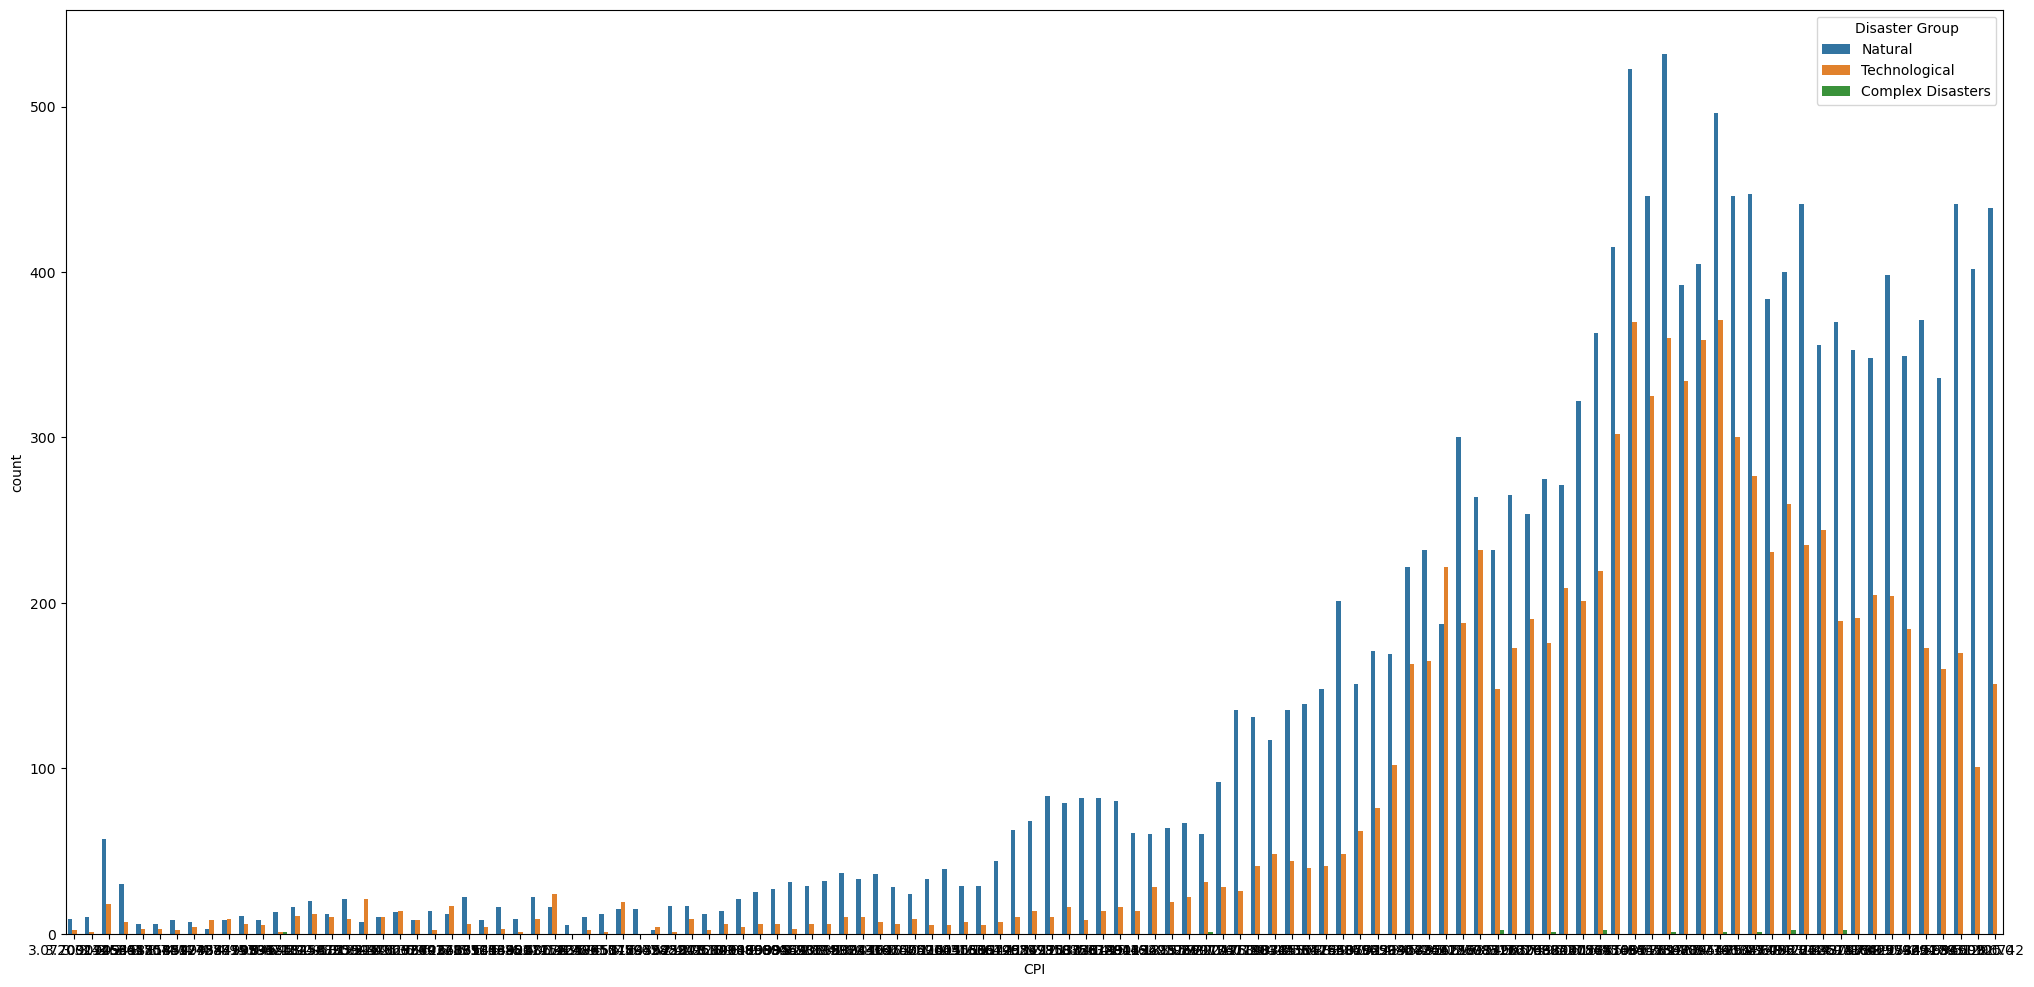

In [52]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'CPI', hue = 'Disaster Group', data = df)

<h3> Correlation plot of the disaster data</h3>

To also prob further, we did a corelation heatmap plot pof our features to have an idea of the relationship between the varaibles. From the heatmap plot, the following can be reached upon:
1. There is a very strong positive corealtion between <b>Year</b> and <b>CPI</b> with correlation values of 0.95 <br>
2. There is a perfect correlation between <b>Number affected</b> and <b>Total affected </b> <br>
3. There are also fairly strong positive correlation between <b> Number affected </b> and <b> Number homeless</b>, and, <b> Total affected</b> with <b> Total homeless</b>.

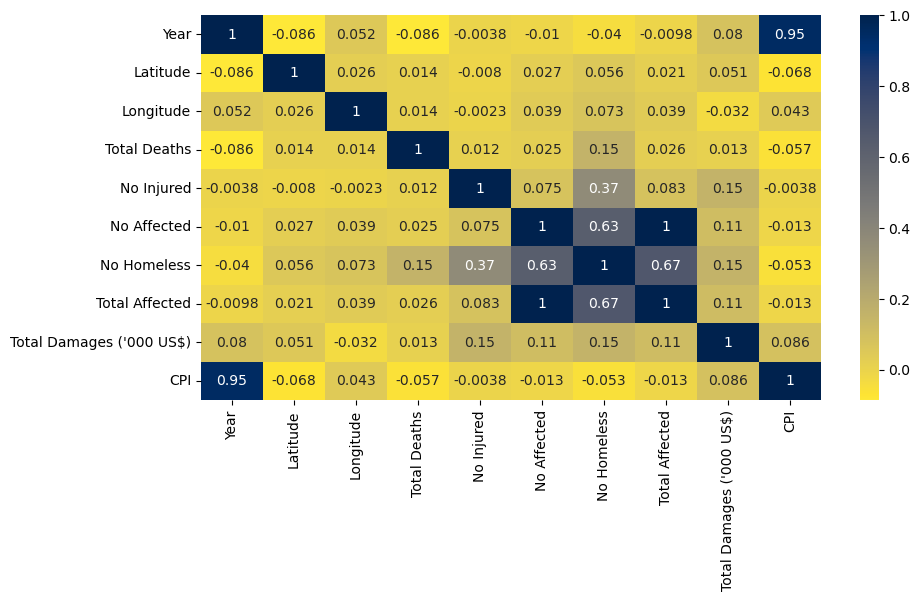

In [53]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= df.corr()
sns.heatmap(corr, cmap= 'cividis_r', annot=True)
plt.show()

<h3> Comparative plot of Disaster type by year as it affects total death and CPI </h3>

(0.0, 300.0)

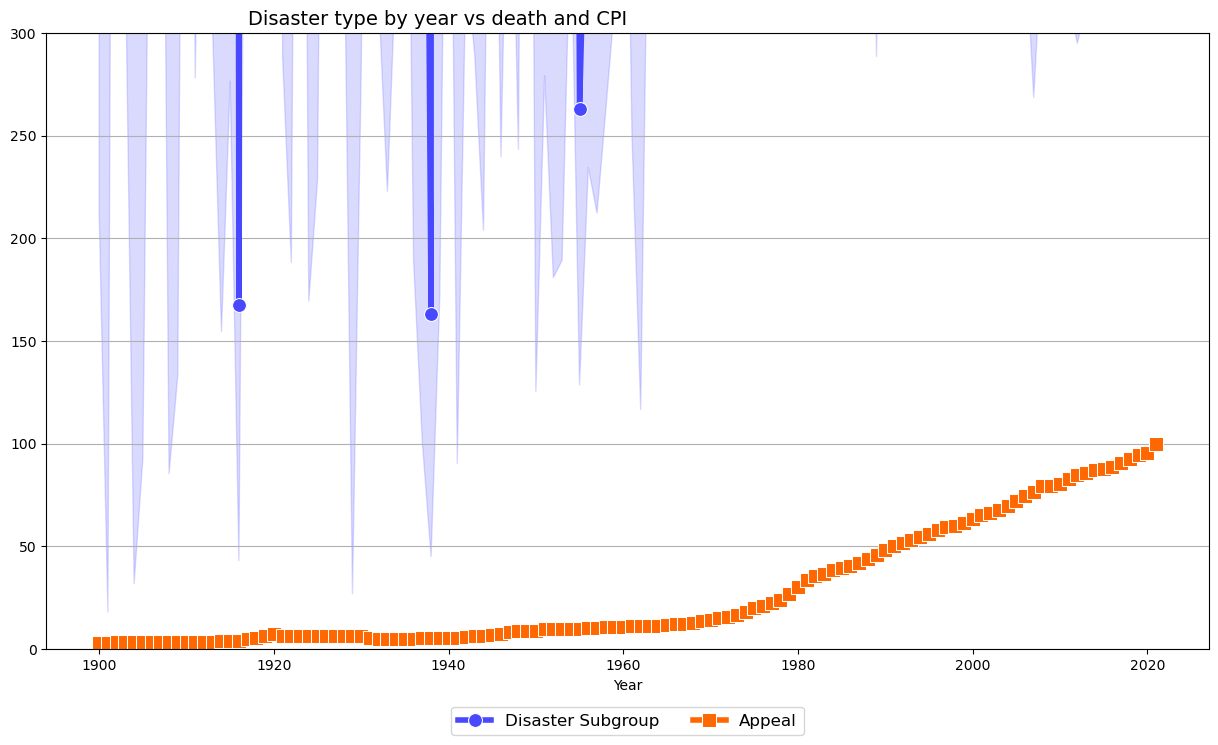

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lineplot(x=df['Year'],y=df['Total Deaths'],data=df,marker='o',markersize=10,lw=4,label = 'Disaster Subgroup',color='#4848FF',ax=ax)
sns.lineplot(x=df['Year'],y=df['CPI'],data=df,marker='s',markersize=10,lw=4,label = 'Appeal',color='#FF6800',ax=ax)
plt.title('Disaster type by year vs death and CPI',fontsize=14,ha='right')
# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=True, shadow=False, ncol=5,fontsize=12)
plt.grid(axis='y')
plt.ylabel('')
plt.ylim(0,300)
#ax.set(xticks=range(0, 11), xticklabels=list(names));

<h2>d. DATA MODELLING AND ANALYSIS </h2>

We have gained some insight into the data, so we are looking at modelling the data using suitable machine learning algorithm. Considering the nature of the data, we will be using the <b> LazyClassifier </b> module to run our data in other to find the best model that can give us the best accuracy and model the data. Click on the link for details on the use of [LazyClassifier](https://pypi.org/project/lazypredict/). Depending on the technological abilities of the device used, the lazy classifier might take some minutes or seconds to run. The progress will be displayed.

In [55]:
df.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'Region', 'Continent', 'Appeal',
       'Declaration', 'Latitude', 'Longitude', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

In [56]:
# split the X variable from the dataset
X = df.drop(columns = 'Disaster Subtype')
y = df['Disaster Subtype']

In [57]:
from lazypredict.Supervised import LazyClassifier
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [20:18<00:00, 42.01s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  0.66               0.47    None      0.66   
RandomForestClassifier             0.69               0.46    None      0.67   
ExtraTreesClassifier               0.66               0.46    None      0.65   
DecisionTreeClassifier             0.61               0.44    None      0.61   
ExtraTreeClassifier                0.59               0.41    None      0.59   
LinearDiscriminantAnalysis         0.60               0.40    None      0.58   
LabelPropagation                   0.58               0.37    None      0.58   
LabelSpreading                     0.58               0.37    None      0.58   
KNeighborsClassifier               0.57               0.33    None      0.56   
CalibratedClassifierCV             0.58               0.32    None      0.54   
GaussianNB                         0.13               0.27    None      0.14   
BernoulliNB                        0.45               0.24    None      0.42   
QuadraticDiscriminantAnalysis      0.12               0.24    None      0.08   
SGDClassifier                      0.39               0.21    None      0.34   
RidgeClassifierCV                  0.48               0.19    None      0.37   
RidgeClassifier                    0.48               0.19    None      0.37   
PassiveAggressiveClassifier        0.38               0.18    None      0.34   
LinearSVC                          0.32               0.16    None      0.27   
Perceptron                         0.29               0.15    None      0.23   
LogisticRegression                 0.39               0.11    None      0.29   
SVC                                0.32               0.08    None      0.21   
AdaBoostClassifier                 0.17               0.07    None      0.07   
LGBMClassifier                     0.10               0.04    None      0.08   
NearestCentroid                    0.01               0.03    None      0.01   
DummyClassifier                    0.12               0.03    None      0.03   

                               Time Taken  
Model                                      
BaggingClassifier                    3.77  
RandomForestClassifier               8.68  
ExtraTreesClassifier                10.57  
DecisionTreeClassifier               1.04  
ExtraTreeClassifier                  0.47  
LinearDiscriminantAnalysis           2.42  
LabelPropagation                    87.59  
LabelSpreading                     148.49  
KNeighborsClassifier                10.38  
CalibratedClassifierCV             575.91  
GaussianNB                           0.79  
BernoulliNB                          0.54  
QuadraticDiscriminantAnalysis        0.86  
SGDClassifier                       19.54  
RidgeClassifierCV                    0.68  
RidgeClassifier                      0.58  
PassiveAggressiveClassifier          3.36  
LinearSVC                          161.99  
Perceptron                           3.64  
LogisticRegression                   8.96  
SVC                                140.51  
AdaBoostClassifier                   9.13  
LGBMClassifier                      16.72  
NearestCentroid                      0.38  
DummyClassifier                      0.36

In [ ]:
#print(models)

<h2>d. CONCLUSION AND RECOMMENDATIONS </h2>

The EM-DAT is an unmined and unexplored dataset. So in this project we have sucessfully performed the following

1. Access and explored the data set. <br>
2. Perform data cleaning and visualization
3. Apply various machine learning algorithm to model the data. About 26 machine learning models were applicable to this perculair dataset. 
4. The model with the best accuracy score is <b> Random forest </b> with a 69% accuracy score.

We will vehemently recommend that further analysis on this data should be done to have better understanding its nature and make appropriate decision.


<h2> CONTRIBUTORS </h2>

[Margaret Oluwadare](margaret.oluwadare@womentechsters.org)

[Loveth Osuagwu](loveth.osuagwu@womentechsters.org)

[Oluchi Okoro (Oluchi Oluchi)](oluchi.oluchi@womentechsters.org)

[Monsurat Onabajo](monsurat.onabajo@womentechsters.org)

[Mariam Anishere](mariam.anishere@womentechsters.org)

[Olubusayo Solola](olubusayo.solola@womentechsters.org)

[Olayemi Ibiloye](olayemi.ibiloye@womentechsters.org)

[Maryann Amaefula](maryann.amaefula@womentechsters.org)

[Olayemi Oloyede](olayemi.oloyede@womentechsters.org)

[Oluwadunsin Olajide](oluwadunsin.olajide@womentechsters.org)